In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import gensim.downloader as api
from gensim.models import KeyedVectors

# Dataset

In [4]:
train_df = pd.read_csv('../../data/processed/train.csv',index_col=0)
train_df

,hypothesis,gold_label,type,uid
premise,,,,
"If Emily passes her driving test, her best friend will take her out for a celebratory dinner.",Emily has a best friend.,E,type5_possessive,train_type5_possessive_0001
"It's not the case that if Emily passes her driving test, her best friend will take her out for a celebratory dinner.",Emily has a best friend.,E,type5_possessive,train_type5_possessive_0002
"Sam believes that if Emily passes her driving test, her best friend will take her out for a celebratory dinner.",Emily has a best friend.,E,type5_possessive,train_type5_possessive_0003
"Is it true that if Emily passes her driving test, her best friend will take her out for a celebratory dinner?",Emily has a best friend.,E,type5_possessive,train_type5_possessive_0004
"If Scarlett finishes her work early, her husband will take her out for dinner.",Scarlett has a husband.,E,type5_possessive,train_type5_possessive_0005
...,...,...,...,...
"If Elizabeth finishes her presentation early, her colleagues will take her out for celebratory drinks.",Elizabeth has supportive colleagues.,N,type5_possessive,train_type5_possessive_6977
"It's not the case that if Elizabeth finishes her presentation early, her colleagues will take her out for celebratory drinks.",Elizabeth has supportive colleagues.,N,type5_possessive,train_type5_possessive_6978
"Sam believes that if Elizabeth finishes her presentation early, her colleagues will take her out for celebratory drinks.",Elizabeth has supportive colleagues.,N,type5_possessive,train_type5_possessive_6979


In [3]:
valid_df = pd.read_csv('../../data/processed/validation.csv',index_col=0)
valid_df

,hypothesis,gold_label,type,uid
premise,,,,
"If Charlotte passes her driving test, her parents will buy her a car.",Charlotte has parents.,E,type5_possessive,validation_type5_possessive_0001
"It's not the case that if Charlotte passes her driving test, her parents will buy her a car.",Charlotte has parents.,E,type5_possessive,validation_type5_possessive_0002
"Sam believes that if Charlotte passes her driving test, her parents will buy her a car.",Charlotte has parents.,E,type5_possessive,validation_type5_possessive_0003
"Is it true that if Charlotte passes her driving test, her parents will buy her a car?",Charlotte has parents.,E,type5_possessive,validation_type5_possessive_0004
"If Lily takes the train to the city, her friend will meet her at the station.",Lily has a friend.,E,type5_possessive,validation_type5_possessive_0005
...,...,...,...,...
"If Sophia decides to attend the concert, his best friend will drive him there.",Sophia has a close friend.,N,type5_possessive,validation_type5_possessive_2363
"It's not the case that if Sophia decides to attend the concert, his best friend will drive him there.",Sophia has a close friend.,N,type5_possessive,validation_type5_possessive_2364
"Sam believes that if Sophia decides to attend the concert, his best friend will drive him there.",Sophia has a close friend.,N,type5_possessive,validation_type5_possessive_2365


In [14]:
test_df = pd.read_csv('../../data/processed/test.csv',index_col=0)
test_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,premise,hypothesis,gold_label,type
9616.0,"If Charlotte passes her driving test, her pare...",Charlotte has parents.,E,type5_possessive
9617.0,It's not the case that if Charlotte passes her...,Charlotte has parents.,E,type5_possessive
9618.0,Sam believes that if Charlotte passes her driv...,Charlotte has parents.,E,type5_possessive
9619.0,Is it true that if Charlotte passes her drivin...,Charlotte has parents.,E,type5_possessive
9628.0,"If Lily takes the train to the city, her frien...",Lily has a friend.,E,type5_possessive
...,...,...,...,...
NaN,"If Sophia decides to attend the concert, his b...",Sophia has a close friend.,N,type5_possessive
NaN,It's not the case that if Sophia decides to at...,Sophia has a close friend.,N,type5_possessive
NaN,Sam believes that if Sophia decides to attend ...,Sophia has a close friend.,N,type5_possessive
NaN,Is it true that if Sophia decides to attend th...,Sophia has a close friend.,N,type5_possessive


In [15]:
train_df['premise'].isna().sum()

0

In [16]:
train_df['hypothesis'].isna().sum()

0

In [17]:
train_df[train_df['hypothesis'].isna()]

,premise,hypothesis,gold_label,type


In [18]:
train_df.loc[train_df['hypothesis'].isna(), 'hypothesis'] = "Martin has incited a response before"

In [19]:
train_df[train_df['hypothesis'].isna()]

,premise,hypothesis,gold_label,type


In [20]:
train_df['gold_label'].value_counts()

gold_label
C    2172
N    2162
E    2152
Name: count, dtype: int64

# Glove

In [21]:
glove_vectors = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [22]:
def encode_glove_sentence(sentence,model):
    words = sentence.split()
    valid_words = [word for word in words if word in model]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in valid_words], axis=0)

In [23]:
def encode_infersent_sentence(sentence,model):
    return model.encode([sentence], tokenize=True)[0]

In [24]:
def get_sentence_embedding(row, model, glove):
    premise = row['premise']
    hypothesis = row['hypothesis'] 
    if glove:
        embedded_premise = encode_glove_sentence(premise,model)
        embedded_hypothesis = encode_glove_sentence(hypothesis,model)
    else:
        embedded_premise = encode_infersent_sentence(premise,model)
        embedded_hypothesis = encode_infersent_sentence(hypothesis,model)
    return np.concatenate((embedded_premise, embedded_hypothesis), axis=0)

In [25]:
train_df['glove_embedding'] = train_df.apply(lambda row: get_sentence_embedding(row, glove_vectors,True), axis=1)

In [26]:
train_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,premise,hypothesis,gold_label,type,glove_embedding
9604.0,"If Emily passes her driving test, her best fri...",Emily has a best friend.,E,type5_possessive,"[0.069057465, 0.38865215, -0.1840484, -0.21967..."
9605.0,It's not the case that if Emily passes her dri...,Emily has a best friend.,E,type5_possessive,"[0.21939042, 0.25260824, -0.14202265, -0.12464..."
9606.0,Sam believes that if Emily passes her driving ...,Emily has a best friend.,E,type5_possessive,"[0.15687543, 0.30070943, -0.10854657, -0.17401..."
9607.0,Is it true that if Emily passes her driving te...,Emily has a best friend.,E,type5_possessive,"[0.18888807, 0.30759755, -0.12772465, -0.16519..."
9608.0,"If Scarlett finishes her work early, her husba...",Scarlett has a husband.,E,type5_possessive,"[0.24861601, 0.38644078, -0.21351472, -0.27863..."
...,...,...,...,...,...
NaN,"If Emily passes her driving test, her best fri...",Emily has a sister.,N,type5_possessive,"[0.069057465, 0.38865215, -0.1840484, -0.21967..."
NaN,It's not the case that if Scarlett finishes he...,Scarlett has a sister-in-law.,N,type5_possessive,"[0.36916268, 0.22392519, -0.1532617, -0.144940..."
NaN,Sam believes that if Chloe finishes his work e...,Chloe has a boss.,N,type5_possessive,"[0.29448354, 0.089123614, -0.019394852, -0.256..."
NaN,Is it true that if Ryan passes his driving tes...,Ryan has siblings.,N,type5_possessive,"[0.32404217, 0.17202039, 0.010957494, -0.28846..."


In [27]:
train_df.to_csv('train_glove_embeddings.csv')

In [28]:
valid_df['glove_embedding'] = valid_df.apply(lambda row: get_sentence_embedding(row, glove_vectors,True), axis=1)

In [29]:
valid_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,premise,hypothesis,gold_label,type,glove_embedding
9600.0,"If Jessica attends the conference, her colleag...",Jessica has a colleague.,E,type5_possessive,"[0.23507889, 0.7431433, -0.3087911, -0.1263506..."
9601.0,It's not the case that if Jessica attends the ...,Jessica has a colleague.,E,type5_possessive,"[0.3690707, 0.44162574, -0.21020706, -0.037490..."
9602.0,Sam believes that if Jessica attends the confe...,Jessica has a colleague.,E,type5_possessive,"[0.31066418, 0.5372636, -0.17693633, -0.088790..."
9603.0,Is it true that if Jessica attends the confere...,Jessica has a colleague.,E,type5_possessive,"[0.34069696, 0.5280746, -0.19675462, -0.083821..."
9620.0,"If Mia's car breaks down, her coworker will gi...",Mia has a coworker.,E,type5_possessive,"[0.3414782, 0.34566912, -0.010364906, -0.10675..."
...,...,...,...,...,...
NaN,"If Margaret graduates from college, her parent...",Margaret has siblings.,N,type5_possessive,"[-0.08452601, 0.478575, -0.1825016, -0.4008751..."
NaN,It's not the case that if Margaret graduates f...,Margaret has siblings.,N,type5_possessive,"[0.14706801, 0.285348, -0.1325863, -0.22643042..."
NaN,Sam believes that if Margaret graduates from c...,Margaret has siblings.,N,type5_possessive,"[0.05899999, 0.34958637, -0.08993324, -0.30285..."
NaN,Is it true that if Margaret graduates from col...,Margaret has siblings.,N,type5_possessive,"[0.10486356, 0.3544593, -0.11455043, -0.282948..."


In [30]:
test_df['glove_embedding'] = test_df.apply(lambda row: get_sentence_embedding(row, glove_vectors,True), axis=1)

In [31]:
test_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,premise,hypothesis,gold_label,type,glove_embedding
9616.0,"If Charlotte passes her driving test, her pare...",Charlotte has parents.,E,type5_possessive,"[0.17170888, 0.4655589, 0.017628895, -0.365464..."
9617.0,It's not the case that if Charlotte passes her...,Charlotte has parents.,E,type5_possessive,"[0.32833287, 0.2631786, -0.0003656149, -0.1912..."
9618.0,Sam believes that if Charlotte passes her driv...,Charlotte has parents.,E,type5_possessive,"[0.26313668, 0.32907525, 0.06787867, -0.268126..."
9619.0,Is it true that if Charlotte passes her drivin...,Charlotte has parents.,E,type5_possessive,"[0.29682538, 0.33590078, 0.029228458, -0.24936..."
9628.0,"If Lily takes the train to the city, her frien...",Lily has a friend.,E,type5_possessive,"[0.41779414, 0.5672047, -0.12455517, -0.113467..."
...,...,...,...,...,...
NaN,"If Sophia decides to attend the concert, his b...",Sophia has a close friend.,N,type5_possessive,"[0.19257289, 0.39037293, -0.009387304, -0.1870..."
NaN,It's not the case that if Sophia decides to at...,Sophia has a close friend.,N,type5_possessive,"[0.3318006, 0.22654662, -0.017176786, -0.08385..."
NaN,Sam believes that if Sophia decides to attend ...,Sophia has a close friend.,N,type5_possessive,"[0.27215302, 0.28173864, 0.043231603, -0.13834..."
NaN,Is it true that if Sophia decides to attend th...,Sophia has a close friend.,N,type5_possessive,"[0.30279136, 0.29145783, 0.009102633, -0.13019..."


In [32]:
train_df.to_csv('train_glove_embeddings.csv')

In [33]:
valid_df.to_csv('valid_glove_embeddings.csv')

In [34]:
test_df.to_csv('test_glove_embeddings.csv')

In [35]:
from IPython.display import FileLink

FileLink('glove_embeddings.csv')

/kaggle/working/glove_embeddings.csv

In [36]:
from IPython.display import FileLink

FileLink('valid_glove_embeddings.csv')

/kaggle/working/valid_glove_embeddings.csv

In [37]:
FileLink('test_glove_embeddings.csv')

/kaggle/working/test_glove_embeddings.csv

## ClassificationNet

In [38]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.model_selection import train_test_split

In [39]:
X_val = np.array(valid_df['glove_embedding'])
X_train = np.array(train_df['glove_embedding'])

In [40]:
y_val = np.array(valid_df['gold_label'].map({'E': 0,'N': 1,'C':2})) 
y_train = np.array(train_df['gold_label'].map({'E': 0,'N': 1,'C':2})) 

In [ ]:
X_train

In [41]:
y_train

array([0, 0, 0, ..., 1, 1, 2])

In [44]:
# DataLoader

class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = self.embeddings[idx]
        label = self.labels[idx]
        return torch.tensor(embedding, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

In [45]:
# Create the dataset
train_dataset = EmbeddingsDataset(X_train, y_train)
val_dataset = EmbeddingsDataset(X_val, y_val)

# Create the DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)
print(len(train_loader))
print(len(val_loader))

811
294


In [46]:
for batch in train_loader:
    # Extract the data and labels
    data, labels = batch
    # Print the first example in the batch
    print("Data:", data[0])
    print("Label:", labels[0])
    # Break after the first batch 
    break

Data: tensor([ 0.3535,  0.2259, -0.2635, -0.1844,  0.5497,  0.3440, -0.5339,  0.3181,
        -0.1206, -0.0456,  0.0633,  0.0991, -0.3081, -0.0968,  0.5490, -0.0392,
        -0.3014,  0.1889, -0.2946,  0.0903, -0.0032,  0.4744,  0.1511,  0.0687,
         0.2425, -1.7699, -0.4351,  0.0203,  0.0878, -0.2366,  2.4555, -0.1694,
        -0.3921, -0.2766,  0.1385,  0.0899,  0.0356,  0.2567,  0.3549, -0.3032,
        -0.0195,  0.0999, -0.3051,  0.0216,  0.0066, -0.1206, -0.0440, -0.2586,
        -0.0480,  0.0124,  0.3929,  0.4082, -0.3276, -0.2694,  0.6781,  0.4103,
        -0.6128,  0.3728, -0.1513, -0.0881, -0.0085,  0.2411, -0.3231, -0.0239,
         0.6424, -0.1880, -0.4943,  0.2857, -0.2066,  0.2821,  0.0313,  0.7431,
         0.1036,  0.1464,  0.2668, -1.8935, -0.3884, -0.0506,  0.0037, -0.1031,
         2.1107, -0.3195, -0.3588, -0.2550,  0.1980,  0.2089,  0.0306,  0.3399,
         0.5402, -0.2639,  0.1296,  0.3619, -0.3499, -0.0722,  0.2285, -0.1919,
        -0.1032, -0.3510,  0.0255,

In [47]:
for batch in val_loader:
    # Extract the data and labels
    data, labels = batch
    # Print the first example in the batch
    print("Data:", data[0])
    print("Label:", labels[0])
    # Break after the first batch 
    break

Data: tensor([ 4.1502e-01,  2.7580e-01, -4.4895e-02,  1.0951e-03,  5.8646e-01,
         1.8828e-01, -5.1572e-01,  1.1271e-01, -9.4568e-02,  1.2740e-01,
        -4.2868e-02,  3.8149e-01, -5.7627e-01, -9.1802e-02,  5.0923e-01,
         1.2897e-01,  1.3790e-01,  4.0672e-02, -2.8439e-01, -2.8980e-01,
         5.1296e-02,  2.4179e-01, -4.3177e-02, -2.9604e-01,  1.7269e-01,
        -1.8681e+00, -1.9942e-01,  5.0309e-02,  1.4700e-01, -2.8041e-01,
         3.1466e+00,  1.4808e-01, -5.1373e-01, -2.1907e-01,  2.5196e-02,
         2.8607e-02,  1.6214e-01,  2.5439e-01,  1.0908e-01, -5.0126e-01,
         2.6263e-03,  7.5364e-02, -3.7746e-01,  5.5504e-02, -1.5776e-01,
        -1.3810e-01, -1.0737e-01,  1.2205e-01, -1.6141e-02,  1.0815e-01,
         3.8263e-01,  2.5200e-01, -1.8315e-01,  2.0701e-01,  5.5449e-01,
         5.8329e-01, -6.6298e-01, -4.2276e-01,  9.7382e-02,  1.2787e-01,
         5.1425e-02, -2.3174e-01, -5.4378e-01,  1.1913e-01,  3.9448e-01,
        -1.0350e-03,  3.3157e-02,  2.6226e-01

In [24]:
config = {
    'nonlinear_fc': 0,
    'fc_dim': 512,
    'n_classes': 3,
    'enc_lstm_dim': 2048,
    'encoder_type': 'InferSent',
    'dpout_fc': 0.5,
    'bsize': 64,
    'word_emb_dim': 8192,
    'enc_lstm_dim': 2048,
    'pool_type': 'max',
    'dpout_model': 0.0,
    'n_enc_layers': 1,
    'version': 2  # Use version 2 for fastText
}

In [48]:
glove_config = {
    'n_classes': 3,
    'fc_dim': 512, # fully connected dimensions
    'word_emb_dim': 100, # size of embeddings
    'dpout_fc': 0.5,
}

In [49]:
# modified 
class ClassificationNet(nn.Module):
    def __init__(self, config):
        super(ClassificationNet, self).__init__()
        
        self.n_classes = config['n_classes']
        self.fc_dim = config['fc_dim']
        self.embedding_dim = config['word_emb_dim']
        
        self.classifier = nn.Sequential(
            nn.Linear(self.embedding_dim, self.fc_dim),
            nn.ReLU(),
            nn.Dropout(p=config['dpout_fc']),
            nn.Linear(self.fc_dim, self.n_classes),
        )

    def forward(self, embeddings):
        output = self.classifier(embeddings)
        return output

In [50]:
glove_model = ClassificationNet(glove_config)
if torch.cuda.is_available():
    glove_model.cuda() 

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(glove_model.parameters(), lr=0.001)
num_epochs = 50

In [52]:
def train_model(model): 
    if torch.cuda.is_available():
        model.cuda()
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
    
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0
    
        for s1_batch, labels in train_loader:  # train_loader is a DataLoader for training data
            if torch.cuda.is_available():
                s1_batch = s1_batch.cuda()
                labels = labels.cuda()
    
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(s1_batch)
            loss = criterion(outputs, labels)
    
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
    
            # Accumulate loss
            running_loss += loss.item()
    
            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
    
        accuracy = 100 * correct_predictions / total_samples
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')
    
        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_running_loss = 0.0
        val_correct_predictions = 0
        val_total_samples = 0
        
        with torch.no_grad():  # No need to calculate gradients during validation
            for s1_batch, labels in val_loader:  # val_loader is a DataLoader for validation data
                if torch.cuda.is_available():
                    s1_batch = s1_batch.cuda()
                    labels = labels.cuda()
    
                # Forward pass
                outputs = model(s1_batch)
                loss = criterion(outputs, labels)
    
                # Accumulate loss
                val_running_loss += loss.item()
    
                # Compute accuracy
                _, predicted = torch.max(outputs.data, 1)
                val_total_samples += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()
    
        val_accuracy = 100 * val_correct_predictions / val_total_samples
        print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_running_loss / len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%')


In [67]:
train_model(glove_model)

Epoch [1/50], Loss: 0.0642, Accuracy: 97.53%
Epoch [1/50], Validation Loss: 0.7179, Validation Accuracy: 88.03%
Epoch [2/50], Loss: 0.0614, Accuracy: 97.81%
Epoch [2/50], Validation Loss: 0.6592, Validation Accuracy: 88.59%
Epoch [3/50], Loss: 0.0628, Accuracy: 97.73%
Epoch [3/50], Validation Loss: 0.6932, Validation Accuracy: 88.20%
Epoch [4/50], Loss: 0.0643, Accuracy: 97.47%
Epoch [4/50], Validation Loss: 0.6289, Validation Accuracy: 88.71%
Epoch [5/50], Loss: 0.0599, Accuracy: 97.84%
Epoch [5/50], Validation Loss: 0.6624, Validation Accuracy: 88.50%
Epoch [6/50], Loss: 0.0584, Accuracy: 97.73%
Epoch [6/50], Validation Loss: 0.7468, Validation Accuracy: 87.82%
Epoch [7/50], Loss: 0.0597, Accuracy: 97.86%
Epoch [7/50], Validation Loss: 0.7134, Validation Accuracy: 88.42%
Epoch [8/50], Loss: 0.0563, Accuracy: 97.81%
Epoch [8/50], Validation Loss: 0.7157, Validation Accuracy: 88.97%
Epoch [9/50], Loss: 0.0527, Accuracy: 98.15%
Epoch [9/50], Validation Loss: 0.7512, Validation Accuracy:

In [30]:
train_model(glove_model)

Epoch [1/50], Loss: 0.5049, Accuracy: 78.21%
Epoch [1/50], Validation Loss: 0.4964, Validation Accuracy: 82.62%
Epoch [2/50], Loss: 0.3525, Accuracy: 85.71%
Epoch [2/50], Validation Loss: 0.4633, Validation Accuracy: 84.07%
Epoch [3/50], Loss: 0.3086, Accuracy: 87.63%
Epoch [3/50], Validation Loss: 0.4801, Validation Accuracy: 84.58%
Epoch [4/50], Loss: 0.2747, Accuracy: 89.16%
Epoch [4/50], Validation Loss: 0.4345, Validation Accuracy: 84.58%
Epoch [5/50], Loss: 0.2564, Accuracy: 89.93%
Epoch [5/50], Validation Loss: 0.4201, Validation Accuracy: 85.86%
Epoch [6/50], Loss: 0.2407, Accuracy: 90.47%
Epoch [6/50], Validation Loss: 0.4133, Validation Accuracy: 86.07%
Epoch [7/50], Loss: 0.2142, Accuracy: 91.91%
Epoch [7/50], Validation Loss: 0.4450, Validation Accuracy: 85.52%
Epoch [8/50], Loss: 0.2067, Accuracy: 92.32%
Epoch [8/50], Validation Loss: 0.4710, Validation Accuracy: 85.95%
Epoch [9/50], Loss: 0.1966, Accuracy: 92.40%
Epoch [9/50], Validation Loss: 0.3962, Validation Accuracy:

In [68]:
# evaluating on test set
test_embeddings = list(test_df['glove_embedding'])
test_embeddings[:3]

[array([ 1.71708882e-01,  4.65558887e-01,  1.76288951e-02, -3.65464866e-01,
         5.26058912e-01,  6.26763284e-01, -7.50754535e-01,  2.18887269e-01,
         1.71126664e-01,  5.52145578e-02, -1.20569095e-01,  1.72553331e-01,
        -3.09216648e-01, -7.29010031e-02,  5.01276731e-01,  7.06233382e-02,
        -4.13173348e-01, -4.02955487e-02, -1.57736745e-02, -5.40122271e-01,
         1.96113780e-01,  7.71107793e-01, -1.15851671e-01,  5.32580093e-02,
         3.89301360e-01, -1.98683333e+00, -2.09934428e-01,  2.90544368e-02,
         4.32764471e-01, -5.49106658e-01,  2.96866679e+00,  4.34161007e-01,
        -3.64409000e-01, -9.44377948e-03,  3.82882535e-01,  4.85129990e-02,
         3.25472541e-02,  2.71809101e-01,  1.97061554e-01, -5.51656663e-01,
        -1.06356889e-01,  1.95198774e-01,  7.75347650e-02,  2.74355919e-03,
         2.34851129e-02, -3.04380000e-01,  2.49822196e-02, -6.22125745e-01,
         1.50862336e-01,  1.09368801e-01,  5.48219979e-01,  3.88469994e-02,
         1.0

In [69]:
if torch.cuda.is_available():
    print("GPU is available!")
    device = torch.device("cuda")
else:
    print("GPU is not available, using CPU")
    device = torch.device("cpu")

GPU is available!


In [70]:
test_embeddings = torch.tensor(test_embeddings).to(device)

In [71]:
with torch.no_grad():
    outputs = glove_model(test_embeddings)
predictions = torch.argmax(outputs, dim=1)
predictions

tensor([0, 0, 0,  ..., 0, 0, 2], device='cuda:0')

In [72]:
test_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,premise,hypothesis,gold_label,type,glove_embedding,predicted_label
9616.0,"If Charlotte passes her driving test, her pare...",Charlotte has parents.,E,type5_possessive,"[0.17170888, 0.4655589, 0.017628895, -0.365464...",E
9617.0,It's not the case that if Charlotte passes her...,Charlotte has parents.,E,type5_possessive,"[0.32833287, 0.2631786, -0.0003656149, -0.1912...",E
9618.0,Sam believes that if Charlotte passes her driv...,Charlotte has parents.,E,type5_possessive,"[0.26313668, 0.32907525, 0.06787867, -0.268126...",E
9619.0,Is it true that if Charlotte passes her drivin...,Charlotte has parents.,E,type5_possessive,"[0.29682538, 0.33590078, 0.029228458, -0.24936...",E
9628.0,"If Lily takes the train to the city, her frien...",Lily has a friend.,E,type5_possessive,"[0.41779414, 0.5672047, -0.12455517, -0.113467...",E
...,...,...,...,...,...,...
NaN,"If Sophia decides to attend the concert, his b...",Sophia has a close friend.,N,type5_possessive,"[0.19257289, 0.39037293, -0.009387304, -0.1870...",E
NaN,It's not the case that if Sophia decides to at...,Sophia has a close friend.,N,type5_possessive,"[0.3318006, 0.22654662, -0.017176786, -0.08385...",E
NaN,Sam believes that if Sophia decides to attend ...,Sophia has a close friend.,N,type5_possessive,"[0.27215302, 0.28173864, 0.043231603, -0.13834...",E
NaN,Is it true that if Sophia decides to attend th...,Sophia has a close friend.,N,type5_possessive,"[0.30279136, 0.29145783, 0.009102633, -0.13019...",E


In [73]:
test_df['predicted_label'] = predictions.cpu()
test_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,premise,hypothesis,gold_label,type,glove_embedding,predicted_label
9616.0,"If Charlotte passes her driving test, her pare...",Charlotte has parents.,E,type5_possessive,"[0.17170888, 0.4655589, 0.017628895, -0.365464...",0
9617.0,It's not the case that if Charlotte passes her...,Charlotte has parents.,E,type5_possessive,"[0.32833287, 0.2631786, -0.0003656149, -0.1912...",0
9618.0,Sam believes that if Charlotte passes her driv...,Charlotte has parents.,E,type5_possessive,"[0.26313668, 0.32907525, 0.06787867, -0.268126...",0
9619.0,Is it true that if Charlotte passes her drivin...,Charlotte has parents.,E,type5_possessive,"[0.29682538, 0.33590078, 0.029228458, -0.24936...",0
9628.0,"If Lily takes the train to the city, her frien...",Lily has a friend.,E,type5_possessive,"[0.41779414, 0.5672047, -0.12455517, -0.113467...",0
...,...,...,...,...,...,...
NaN,"If Sophia decides to attend the concert, his b...",Sophia has a close friend.,N,type5_possessive,"[0.19257289, 0.39037293, -0.009387304, -0.1870...",0
NaN,It's not the case that if Sophia decides to at...,Sophia has a close friend.,N,type5_possessive,"[0.3318006, 0.22654662, -0.017176786, -0.08385...",0
NaN,Sam believes that if Sophia decides to attend ...,Sophia has a close friend.,N,type5_possessive,"[0.27215302, 0.28173864, 0.043231603, -0.13834...",0
NaN,Is it true that if Sophia decides to attend th...,Sophia has a close friend.,N,type5_possessive,"[0.30279136, 0.29145783, 0.009102633, -0.13019...",0


In [74]:
test_df['predicted_label'] = test_df['predicted_label'].map({0: 'E',1: 'N', 2: 'C'})
test_df 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,premise,hypothesis,gold_label,type,glove_embedding,predicted_label
9616.0,"If Charlotte passes her driving test, her pare...",Charlotte has parents.,E,type5_possessive,"[0.17170888, 0.4655589, 0.017628895, -0.365464...",E
9617.0,It's not the case that if Charlotte passes her...,Charlotte has parents.,E,type5_possessive,"[0.32833287, 0.2631786, -0.0003656149, -0.1912...",E
9618.0,Sam believes that if Charlotte passes her driv...,Charlotte has parents.,E,type5_possessive,"[0.26313668, 0.32907525, 0.06787867, -0.268126...",E
9619.0,Is it true that if Charlotte passes her drivin...,Charlotte has parents.,E,type5_possessive,"[0.29682538, 0.33590078, 0.029228458, -0.24936...",E
9628.0,"If Lily takes the train to the city, her frien...",Lily has a friend.,E,type5_possessive,"[0.41779414, 0.5672047, -0.12455517, -0.113467...",E
...,...,...,...,...,...,...
NaN,"If Sophia decides to attend the concert, his b...",Sophia has a close friend.,N,type5_possessive,"[0.19257289, 0.39037293, -0.009387304, -0.1870...",E
NaN,It's not the case that if Sophia decides to at...,Sophia has a close friend.,N,type5_possessive,"[0.3318006, 0.22654662, -0.017176786, -0.08385...",E
NaN,Sam believes that if Sophia decides to attend ...,Sophia has a close friend.,N,type5_possessive,"[0.27215302, 0.28173864, 0.043231603, -0.13834...",E
NaN,Is it true that if Sophia decides to attend th...,Sophia has a close friend.,N,type5_possessive,"[0.30279136, 0.29145783, 0.009102633, -0.13019...",E


In [75]:
test_df.to_csv('Exp5_glove_results_run3.csv')

In [76]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

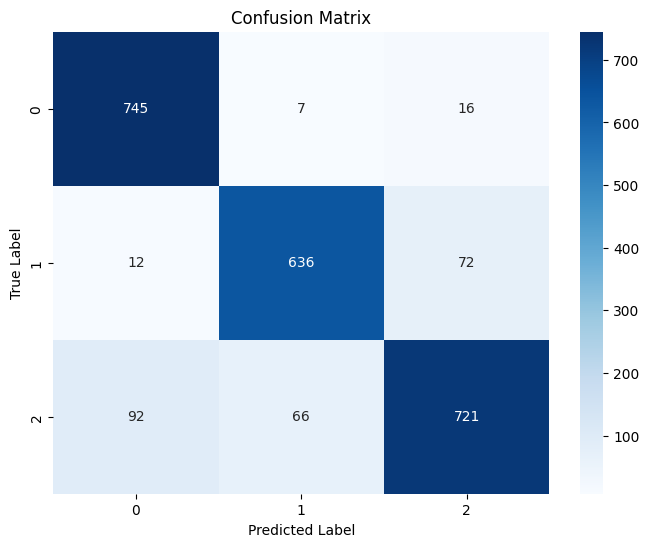

In [77]:
# Create the testing confusion matrix
cm = confusion_matrix(test_df['gold_label'], test_df['predicted_label'])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [78]:
report_dict = classification_report(test_df['gold_label'], test_df['predicted_label'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose() 
report_df.columns.name = 'label'
report_df

label,precision,recall,f1-score,support
C,0.877503,0.970052,0.921459,768.000000
E,0.897038,0.883333,0.890133,720.000000
N,0.891224,0.820250,0.854265,879.000000
accuracy,0.888044,0.888044,0.888044,0.888044
macro avg,0.888588,0.891212,0.888619,2367.000000
weighted avg,0.888540,0.888044,0.886978,2367.000000


In [79]:
def compute_metrics_by_type(group):
    predictions = group['gold_label']
    labels = group['predicted_label']
    acc = np.mean(predictions == labels)
    precision = precision_score(labels, predictions,average="weighted")
    recall = recall_score(labels, predictions,average="weighted")
    f1 = f1_score(labels, predictions,average="weighted")
    return pd.Series({'accuracy': round(acc,2), 'precision': round(precision,2), 'recall': round(recall,2), 'f1_score': round(f1,2)})

In [80]:
metrics_by_type = test_df.groupby('type').apply(compute_metrics_by_type).reset_index()
metrics_by_type.columns.name = 'ID'
metrics_by_type

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

ID,type,accuracy,precision,recall,f1_score
0,type1_again,0.75,0.77,0.75,0.74
1,type1_possessive,0.91,0.91,0.91,0.90
2,type2_again,0.82,0.75,0.82,0.77
3,type2_possessive,0.94,0.94,0.94,0.94
4,type3_again,0.90,0.93,0.90,0.92
5,type3_possessive,0.95,0.91,0.95,0.93
6,type4_possessive,0.88,0.92,0.88,0.89
7,type5_again,0.85,0.82,0.85,0.82
8,type5_possessive,0.94,0.97,0.94,0.95
